In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

### Data Reading 

In [2]:
df1 = pd.read_csv("/kaggle/input/flight-prediction-dataset/economy..csv")
df2 = pd.read_csv("/kaggle/input/flight-prediction-dataset/busines.csv")

In [3]:
df1.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [4]:
df1.shape

(206774, 11)

In [5]:
df2.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [6]:
df2.shape

(93487, 11)

In [7]:
df1["class"] = "Economy"
df2["class"] = "Business"

    Before mearging both the files am creating a new feature called class which indecates weather the data is from economy  or business

In [8]:
df = df1.merge(df2,how = 'outer')


In [9]:
df.shape

(300261, 12)

In [10]:
df.tail()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
300256,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"69,265",Business
300257,31-03-2022,Vistara,UK,826,12:30,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,"77,105",Business
300258,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"79,099",Business
300259,31-03-2022,Vistara,UK,828,07:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00,Hyderabad,"81,585",Business
300260,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"81,585",Business


In [11]:
df.sample(5)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
110620,20-02-2022,Vistara,UK,820,17:50,Bangalore,15h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:40,Hyderabad,"11,205",Economy
55005,24-02-2022,Vistara,UK,994,10:25,Mumbai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:25,Bangalore,"12,468",Economy
218439,20-03-2022,Air India,AI,502,13:30,Delhi,28h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:35,Kolkata,"57,405",Business
4426,05-03-2022,Vistara,UK,705,07:30,Delhi,05h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,13:00,Mumbai,"7,838",Economy
2558,25-02-2022,Vistara,UK,943,07:30,Delhi,02h 15m,non-stop,09:45,Mumbai,"3,100",Economy


    1. I have used df.sample to get random rows from dataset
    2. As we can see that class features has been added.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300261 entries, 0 to 300260
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        300261 non-null  object
 1   airline     300261 non-null  object
 2   ch_code     300261 non-null  object
 3   num_code    300261 non-null  int64 
 4   dep_time    300261 non-null  object
 5   from        300261 non-null  object
 6   time_taken  300261 non-null  object
 7   stop        300261 non-null  object
 8   arr_time    300261 non-null  object
 9   to          300261 non-null  object
 10  price       300261 non-null  object
 11  class       300261 non-null  object
dtypes: int64(1), object(11)
memory usage: 29.8+ MB


In [13]:
df.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
class         0
dtype: int64

    We can clearly see that there is no null value is present.

### Data Validation

In [14]:
a = (pd.to_datetime(df["dep_time"]).dt.hour % 24 + 4) // 4

#Divided the time of departure into 6 different time format which gives numbers from 1 to 6 #(return a series)

a.replace({1: 'Late Night', 2: 'Early Morning', 3: 'Morning', 4: 'Afternoon', 5: 'Evening', 6: 'Night'} ,inplace = True)

# it will replace values 1:latenight to 6: night

df["dep_time"] = a

Here i have converted a series of time into specific categorie by dividing the 24 hour format into 6 categories for Dep_time. 


In [15]:
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709,Evening,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",Economy
1,11-02-2022,SpiceJet,SG,8157,Early Morning,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",Economy
2,11-02-2022,AirAsia,I5,764,Early Morning,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",Economy
3,11-02-2022,Vistara,UK,995,Morning,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",Economy
4,11-02-2022,Vistara,UK,963,Morning,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",Economy


In [16]:
b = (pd.to_datetime(df["arr_time"]).dt.hour % 24 + 4) // 4

#Divided the time of departure into 6 different time format which gives numbers from 1 to 6 #(return a series)

b.replace({1: 'Late Night', 2: 'Early Morning', 3: 'Morning', 4: 'Afternoon', 5: 'Evening', 6: 'Night'} ,inplace = True)

# it will replace values 1:latenight to 6: night

df["arr_time"] = b

Here i have converted a series of time into specific categorie by dividing the 24 hour format into 6 categories for arr_time.

In [17]:
df.head(2)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709,Evening,Delhi,02h 10m,non-stop,Night,Mumbai,"5,953",Economy
1,11-02-2022,SpiceJet,SG,8157,Early Morning,Delhi,02h 20m,non-stop,Morning,Mumbai,"5,953",Economy


In [18]:
# making duration in float values by calculating only hours

import re
b = pd.DataFrame(df["time_taken"].str.split(" ",expand = True).to_numpy(),columns = ["Hour","Minute"])
b["Hour"]  = b["Hour"].apply(lambda x : re.sub("[^0-9]","",x)).astype(int)
b["Minute"]  = b["Minute"].apply(lambda y : re.sub("[^0-9]","",y)) # Because we has no values in minute colum somewhere 
b["Minute"]  = np.where(b["Minute"] == "", 0, b["Minute"]) # replaceing "" with 0
b["Minute"] = b["Minute"].astype(int) #converting data type
df["time_taken"] = np.around(b["Hour"] + b["Minute"]/60,2) # saving the total hours in duration feature
df.head(2)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709,Evening,Delhi,2.17,non-stop,Night,Mumbai,"5,953",Economy
1,11-02-2022,SpiceJet,SG,8157,Early Morning,Delhi,2.33,non-stop,Morning,Mumbai,"5,953",Economy


Here i have converted the time_taken column from object to int datatype 

In [19]:
df["stop"].value_counts()

1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t                      243603
non-stop                                                                         36044
2+-stop                                                                          13288
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t                 1839
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t                 1398
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t                674
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t               381
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\n\t\t\t\t\t\t\t\t\t\t\t\t                  354
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia MYQ\n\t\t\t\t\t\t\t\t\t\t\t\t                  321
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\n\t\t\t\t\t\t\t\t\t\t\t\t          301
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia KLH\n\t\t\t\t\t\t\t\t\t\t\t\t                  284
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia JGB\n\t

In [20]:
# making the stops in numeric data type by giving stops accordingly
df["stop"] = df["stop"].apply(lambda r: re.sub("[^0-9]","",r)) # taking only digits
df["stop"] = np.where(df["stop"] == "", 0, df["stop"]) # replacign "" with 0
df["stop"] = df["stop"].astype(int) # changing object to int
df.head(1)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709,Evening,Delhi,2.17,0,Night,Mumbai,"5,953",Economy


Here i have converted the value of no of stop from object to numerical by counting the stops into 0,1,2,3,...

In [21]:
df["stop"].value_counts()

1    250929
0     36044
2     13288
Name: stop, dtype: int64

In [22]:
df['price'].unique()

array(['5,953', '5,956', '5,955', ..., '87,051', '74,731', '77,105'],
      dtype=object)

In [23]:
# removing ','  from price column
df["price"] = df["price"].apply(lambda r: re.sub("[^0-9]","",r)) # taking only digits
df["price"] = df["price"].astype(int) # changing object to int
df.head(1)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709,Evening,Delhi,2.17,0,Night,Mumbai,5953,Economy


### Feature Extraction 

In [24]:
dd = pd.DataFrame(df["date"].str.split("-",expand = True).to_numpy().astype(int),columns = ["day","month","year"])
df["days_left"] = np.where(dd["month"] > 2, dd["day"] +18, np.where(dd["month"] == 2, dd["day"] -10, dd["day"]))
df.sample(5)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,days_left
241827,15-02-2022,Vistara,UK,986,Night,Mumbai,11.17,1,Morning,Chennai,72797,Business,5
249846,24-02-2022,Vistara,UK,808,Morning,Bangalore,15.83,1,Night,Mumbai,67004,Business,14
74412,12-03-2022,GO FIRST,G8,7537,Afternoon,Mumbai,7.33,1,Night,Hyderabad,3916,Economy,30
106987,13-03-2022,Vistara,UK,897,Early Morning,Bangalore,11.67,2,Evening,Kolkata,7421,Economy,31
217299,03-03-2022,Vistara,UK,975,Early Morning,Delhi,14.17,1,Evening,Kolkata,65529,Business,21


Here i have extracted an new feature called days_left by subtracting the trip date by the booking date. In this i have considerd 11/02/22 as the booking date for reference 

In [25]:
# changing date type of num_code from object to str
df["num_code"]=df["num_code"].astype('str')

# adding column ch_code wit num_code for making new feature called flight
df["flight"] = df["ch_code"] +"-"+ df["num_code"]

Here i have mearged column ch_code wit num_code for making new feature called flight

In [26]:
# Removing unnecesary columns from data

df.drop(["date", "ch_code", "num_code"],axis = 1,inplace = True)

df.head(1)

,airline,dep_time,from,time_taken,stop,arr_time,to,price,class,days_left,flight
0,SpiceJet,Evening,Delhi,2.17,0,Night,Mumbai,5953,Economy,1,SG-8709


In [27]:
df.rename({"dep_time": "departure_time", "from": "source_city","time_taken": "duration", "stop": "stops", "arr_time": "arrival_time",
           "to":"destination_city"}, axis = 1, inplace = True)

df.head()

,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,days_left,flight
0,SpiceJet,Evening,Delhi,2.17,0,Night,Mumbai,5953,Economy,1,SG-8709
1,SpiceJet,Early Morning,Delhi,2.33,0,Morning,Mumbai,5953,Economy,1,SG-8157
2,AirAsia,Early Morning,Delhi,2.17,0,Early Morning,Mumbai,5956,Economy,1,I5-764
3,Vistara,Morning,Delhi,2.25,0,Afternoon,Mumbai,5955,Economy,1,UK-995
4,Vistara,Morning,Delhi,2.33,0,Morning,Mumbai,5955,Economy,1,UK-963


In [28]:
# arranging the features 
df = df[["airline","flight","source_city","departure_time","stops",
     "arrival_time","destination_city","class","duration","days_left","price"]]

df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early Morning,0,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early Morning,0,Early Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955


Renaming the Columans for better understanding

In [29]:
# exporting the file in csv
#df.to_csv("Clean_flight_data_Vivek.csv", index = False)

The various features of the cleaned dataset are explained below:

1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.

8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

11) Price: Target variable stores information of the ticket price.

## Data Visualization 

In [30]:
df.sample(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
188168,Vistara,UK-826,Chennai,Afternoon,0,Afternoon,Mumbai,Economy,2.00,7,5883
75470,GO FIRST,G8-305,Mumbai,Early Morning,1,Evening,Hyderabad,Economy,13.08,37,3687
69351,Air India,AI-806,Mumbai,Morning,1,Morning,Kolkata,Economy,24.08,44,5685
197734,Indigo,6E-987,Chennai,Early Morning,0,Early Morning,Bangalore,Economy,0.83,48,1443
75137,Vistara,UK-877,Mumbai,Morning,0,Afternoon,Hyderabad,Economy,1.50,35,3450


In [31]:
# Checking null values in the data
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [32]:
# getting all the details of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300261 entries, 0 to 300260
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300261 non-null  object 
 1   flight            300261 non-null  object 
 2   source_city       300261 non-null  object 
 3   departure_time    300261 non-null  object 
 4   stops             300261 non-null  int64  
 5   arrival_time      300261 non-null  object 
 6   destination_city  300261 non-null  object 
 7   class             300261 non-null  object 
 8   duration          300261 non-null  float64
 9   days_left         300261 non-null  int64  
 10  price             300261 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 27.5+ MB


In [33]:
# getting all statical insights of the numarical features 

df.describe()

,stops,duration,days_left,price
count,300261.000000,300261.000000,300261.000000,300261.000000
mean,0.924213,12.219142,26.004473,20883.717666
std,0.398188,7.200348,13.560985,22695.911266
min,0.000000,0.830000,1.000000,1105.000000
25%,1.000000,6.750000,15.000000,4783.000000
50%,1.000000,11.250000,26.000000,7425.000000
75%,1.000000,16.170000,38.000000,42521.000000
max,2.000000,103.000000,49.000000,123071.000000


#### Finding out the duplicate rows:- 

In [34]:
# Checking Duplicate rows

df.duplicated().sum()

2

In [35]:
# displaying duplicate rows

duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate.head()

Duplicate Rows :


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
517,Air India,AI-807,Delhi,Evening,1,Morning,Mumbai,Economy,15.25,4,12150
6081,Air India,AI-475,Delhi,Afternoon,1,Afternoon,Mumbai,Economy,24.58,31,4780


In [36]:
# dropping the duplicate rows

df.drop_duplicates(keep='first', inplace=True)

df.shape

(300259, 11)

### Univariate analysis For Categorical values

#### For Column Airline :-

In [37]:
df["airline"].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO FIRST', 'Indigo',
       'Air India', 'Trujet', 'StarAir'], dtype=object)

In [38]:
print("Total no of individual airlines counts are :")

df["airline"].value_counts().to_frame().style.background_gradient(cmap='copper')

Total no of individual airlines counts are :


,airline
Vistara,127859
Air India,80892
Indigo,43120
GO FIRST,23177
AirAsia,16098
SpiceJet,9011
StarAir,61
Trujet,41


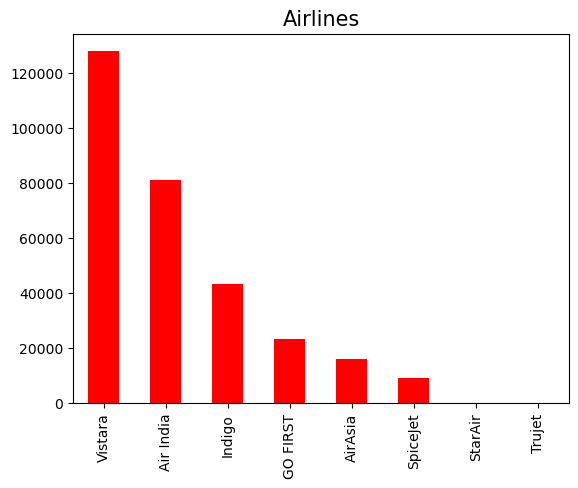

In [39]:
df["airline"].value_counts().plot(kind = "bar",cmap='flag')
plt.title('Airlines',fontsize=15)
plt.show()

    From this visuals we can see that Vistara has the maximum no of aircrafts with 127859 followed by Air India , Indigo and soo on

#### For column Flight 

In [40]:
df["flight"].nunique()

1569

    This indicates that total no of flights there are 1569

In [41]:
print("Top 10 Flight with Total no of Ticket sold :")

df["flight"].value_counts().nlargest(10).to_frame().style.background_gradient(cmap='copper')

Top 10 Flight with Total no of Ticket sold :


,flight
UK-706,3235
UK-772,2741
UK-720,2650
UK-836,2542
UK-822,2468
UK-828,2440
UK-874,2423
UK-832,2404
UK-826,2335
UK-860,2329


    From this we can clearly see that UK-706 flight has maximum no of travelers

#### For Source City :- 

In [42]:
# Counting total no of unique source city

df["source_city"].nunique()

6

In [43]:
# Displaying Source City name

df["source_city"].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [44]:
print("Total no of Scheduled departure from Each City are :")

df["source_city"].value_counts().to_frame().style.background_gradient(cmap='copper')

Total no of Scheduled departure from Each City are :


,source_city
Delhi,61343
Mumbai,60903
Bangalore,52106
Kolkata,46347
Hyderabad,40860
Chennai,38700


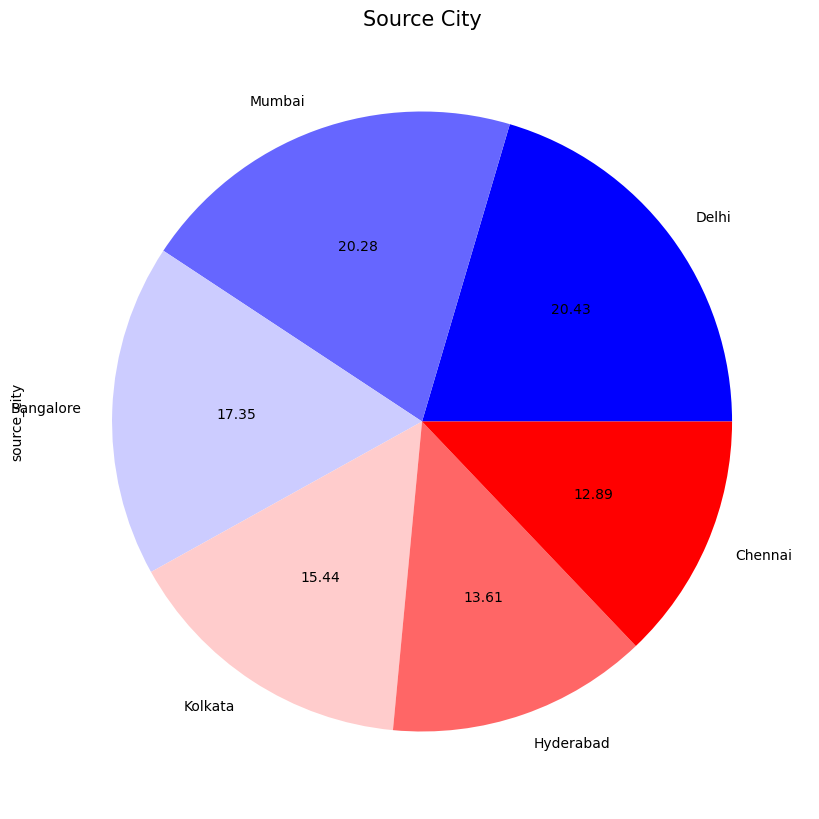

In [45]:
plt.figure(figsize = (10,20))
df['source_city'].value_counts().plot(kind = "pie", textprops={'color':'black'}, autopct = "%.2f",cmap = "bwr" )
plt.title('Source City',fontsize=15)
plt.show()

    From this visualization we can clearly see that Delhi has the maximum schedule departure with around 20.5%(61343) of total flight followed by Mumbai(20.28%)(60903),Bangalore(17.35%)(52106) and so on.

#### For Column Departure_time :- 

In [46]:
print("Total no of Ticket scheduled in each TimeZone are  :")

df["departure_time"].value_counts().to_frame().style.background_gradient(cmap='pink')

Total no of Ticket scheduled in each TimeZone are  :


,departure_time
Morning,75250
Evening,65416
Early Morning,62042
Night,49504
Afternoon,46857
Late Night,1190


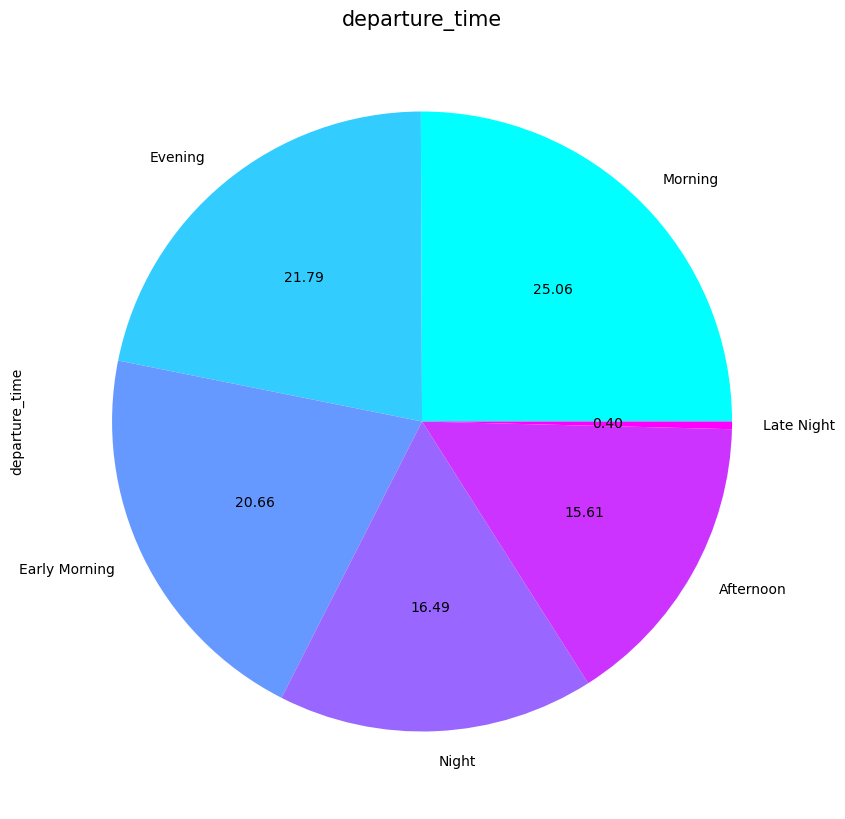

In [47]:
plt.figure(figsize = (10,20))
df['departure_time'].value_counts().plot(kind = "pie", textprops={'color':'black'}, autopct = "%.2f",cmap = "cool" )
plt.title('departure_time',fontsize=15)
plt.show()

    From this visualization we can clearly see that Morning has the maximum schedule departure with around 25%(75250) of total flight followed by Evening (21.78%)(60903),Early Morning(20%)(6200) and so on.

#### For Column arrival_time :-

In [48]:
# Counting total types Stops

df["arrival_time"].nunique()

6

In [49]:
print("Total no of Ticket scheduled for arrivl in each TimeZone are  :")

df["arrival_time"].value_counts().to_frame().style.background_gradient(cmap='pink')

Total no of Ticket scheduled for arrivl in each TimeZone are  :


,arrival_time
Night,93584
Evening,77104
Morning,63782
Afternoon,37907
Late Night,14001
Early Morning,13881


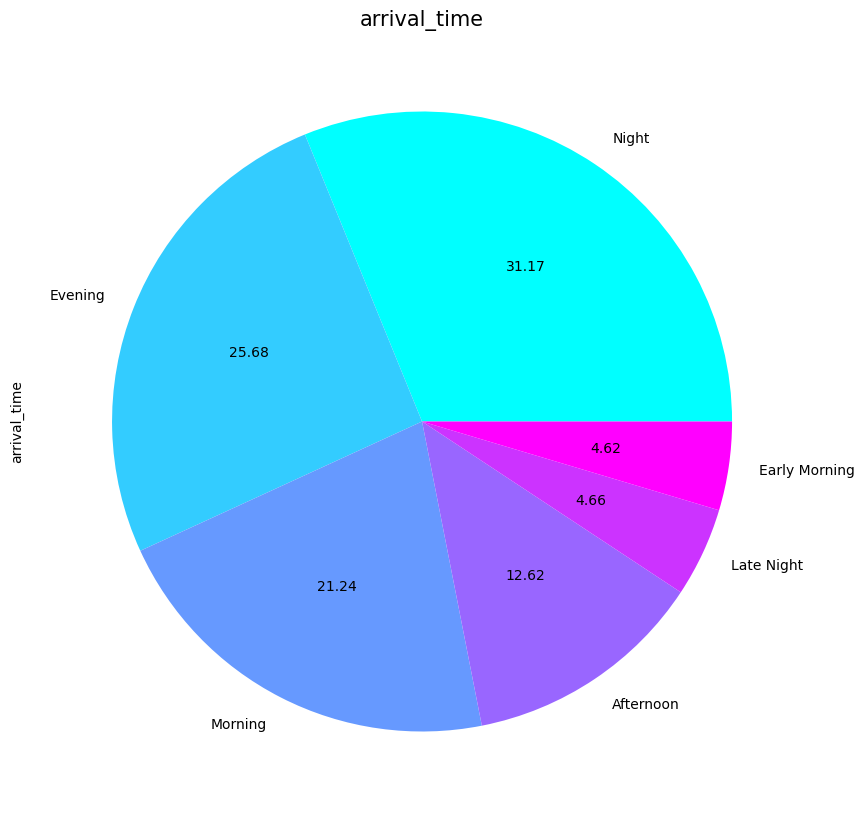

In [50]:
plt.figure(figsize = (10,20))
df['arrival_time'].value_counts().plot(kind = "pie", textprops={'color':'black'}, autopct = "%.2f",cmap = "cool" )
plt.title('arrival_time',fontsize=15)
plt.show()

    From this visualization we can clearly see that Night has the maximum schedule arrival with around 31%(93584) of total flight followed by Evening (25.68%)(77104), Morning(21.24%)(63782) and so on.

#### For culumn destination_city :-	 

In [51]:
# Counting total no of unique destination city

df["destination_city"].nunique()

6

In [52]:
df["destination_city"].unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [53]:
print("Total no of Scheduled arrival fro Each City are :")

df["destination_city"].value_counts().to_frame().style.background_gradient(cmap='copper')

Total no of Scheduled arrival fro Each City are :


,destination_city
Mumbai,59107
Delhi,57361
Bangalore,51112
Kolkata,49535
Hyderabad,42776
Chennai,40368


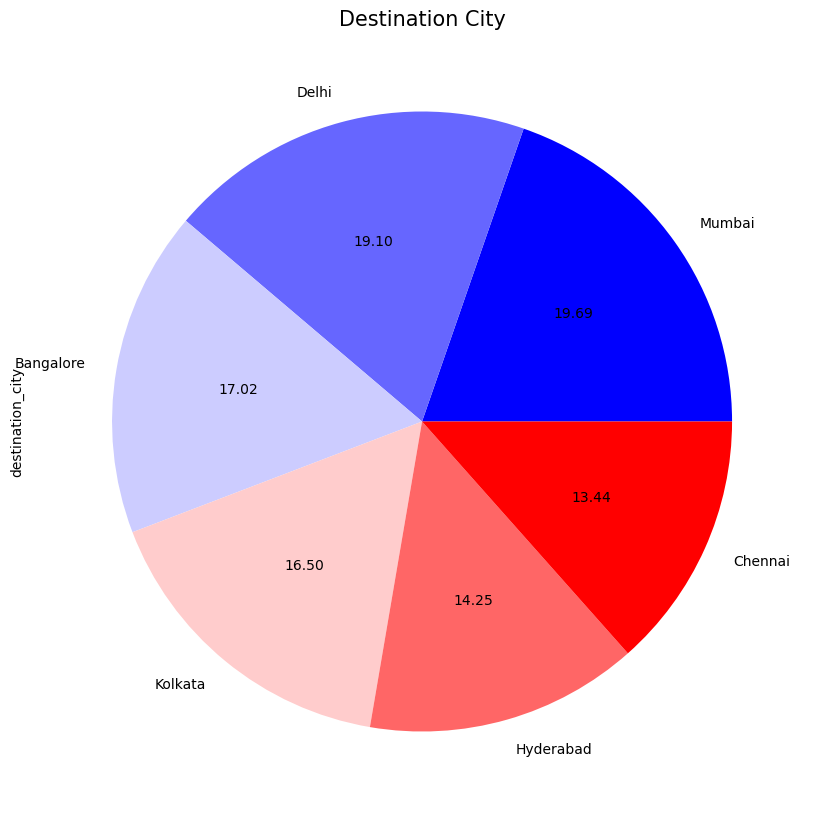

In [54]:
plt.figure(figsize = (10,20))
df['destination_city'].value_counts().plot(kind = "pie", textprops={'color':'black'}, autopct = "%.2f",cmap = "bwr" )
plt.title('Destination City',fontsize=15)
plt.show()

    From this visualization we can clearly see that Mumbai has the maximum schedule arrival with around 19.5%(59107) of total flight followed by Delhi(19%)(57361),Bangalore(17%)(51112) and so on.

#### For column Class :- 

In [55]:
# Counting total no of unique Class

df["class"].nunique()

2

In [56]:
df["class"].unique()

array(['Economy', 'Business'], dtype=object)

In [57]:
print("Total no of Ticket sold of each class are :")

df["class"].value_counts().to_frame().style.background_gradient(cmap='copper')

Total no of Ticket sold of each class are :


,class
Economy,206772
Business,93487


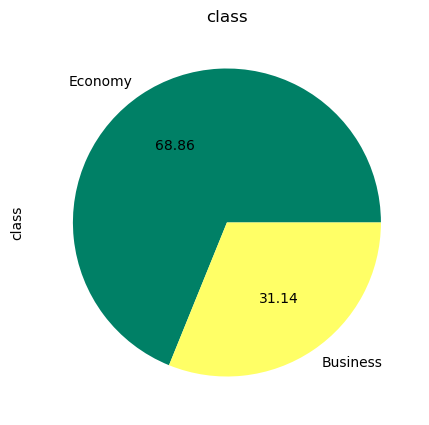

In [58]:
plt.figure(figsize = (15,5))
df["class"].value_counts().plot(kind = "pie",autopct = "%.2f",cmap = 'summer')
plt.title("class")
plt.show()

    From this visualization we can clearly see that maximum no of ticket has been sold of economy class which is of arround (68.8%)(206772) of total ticket sold

### Univarient analysis Numerical Column 

In [59]:
df.describe()

,stops,duration,days_left,price
count,300259.000000,300259.000000,300259.000000,300259.000000
mean,0.924212,12.219091,26.004529,20883.800386
std,0.398189,7.200335,13.560967,22695.962230
min,0.000000,0.830000,1.000000,1105.000000
25%,1.000000,6.750000,15.000000,4783.000000
50%,1.000000,11.250000,26.000000,7425.000000
75%,1.000000,16.170000,38.000000,42521.000000
max,2.000000,103.000000,49.000000,123071.000000


#### For Column Stops :- 

In [60]:
# Counting total types Stops

df["stops"].nunique()

3

In [61]:
df["stops"].unique()

array([0, 1, 2])

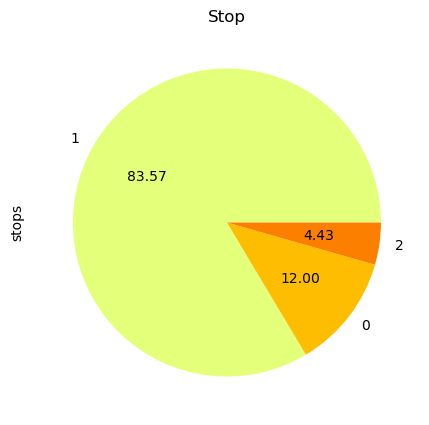

In [62]:
plt.figure(figsize = (15,5))
df["stops"].value_counts().plot(kind = "pie",autopct = "%.2f",cmap = 'Wistia')
plt.title("Stop")
plt.show()

In [63]:
print("Total no of ticket with each type of Stops are :")

df["stops"].value_counts().to_frame().style.background_gradient(cmap='copper')

Total no of ticket with each type of Stops are :


,stops
1,250927
0,36044
2,13288


    From this visualization we can clearly see that 1 stop destination Ticket are maximum with arround 83.5%(250927) followed by 0 stop Ticket(12%)

#### For column duration  :- 

In [64]:
df["duration"].nunique()

479

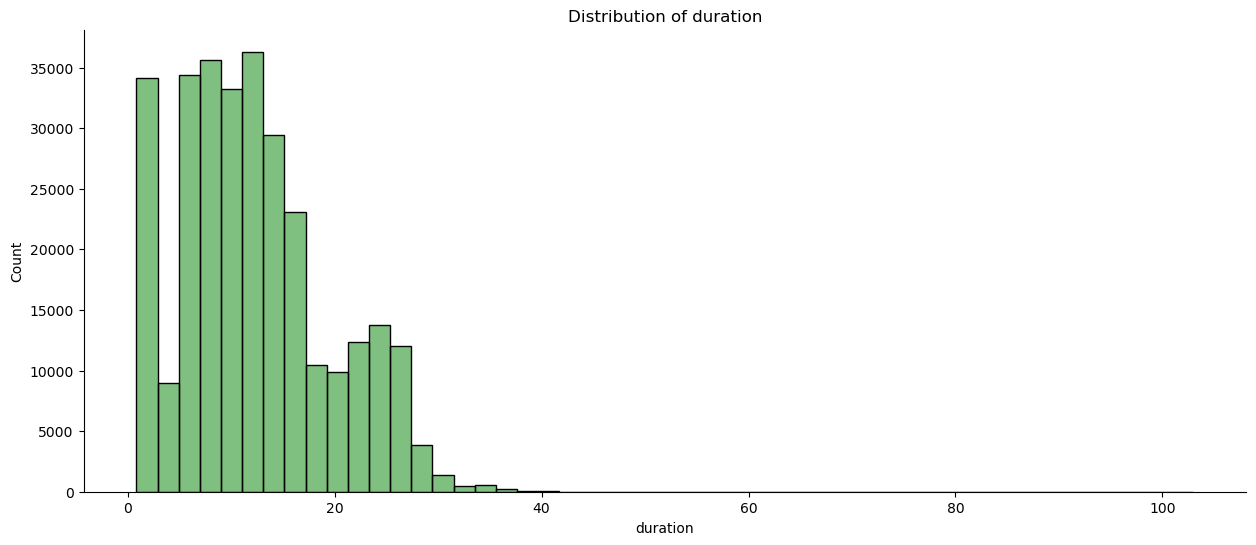

In [65]:
plt.figure(figsize = (15,6))
sns.histplot(data = df, x ="duration", bins = 50, color = "green", alpha =.5)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Distribution of duration")

plt.show()

<AxesSubplot:xlabel='duration', ylabel='Density'>

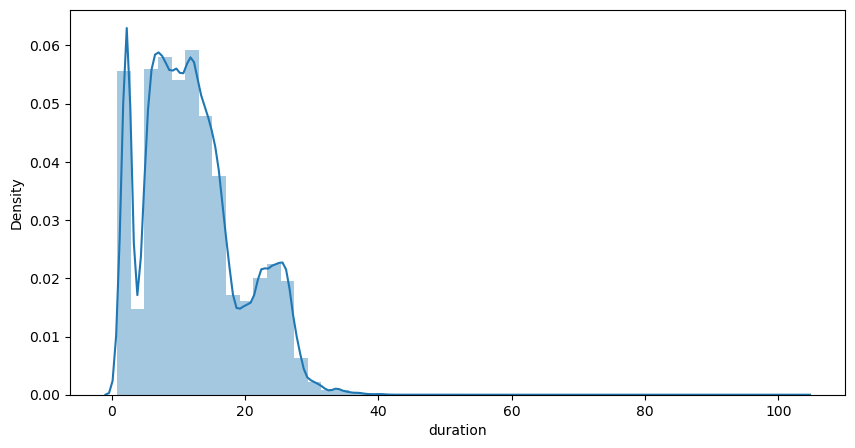

In [66]:
# distribution of data numerical column

plt.figure(figsize = (10,5))  
sns.distplot(df["duration"])

    from this visualization we can see that maximum no flight duration is between 0 to 16 hours

#### For column days_left :-

In [67]:
df["days_left"].nunique()

49

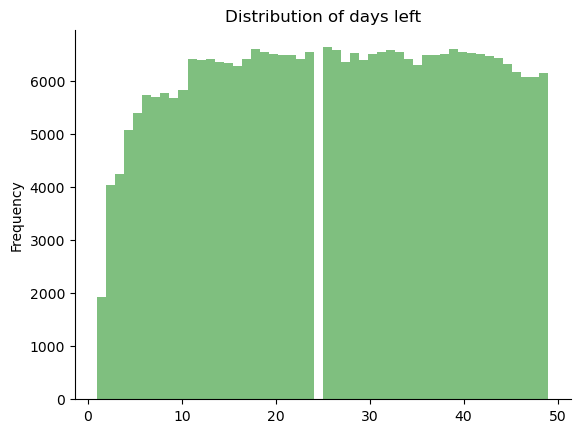

In [68]:
df["days_left"].plot(kind = "hist", bins =50, color = "green", alpha =.5)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Distribution of days left")
plt.show()

<AxesSubplot:xlabel='days_left', ylabel='Density'>

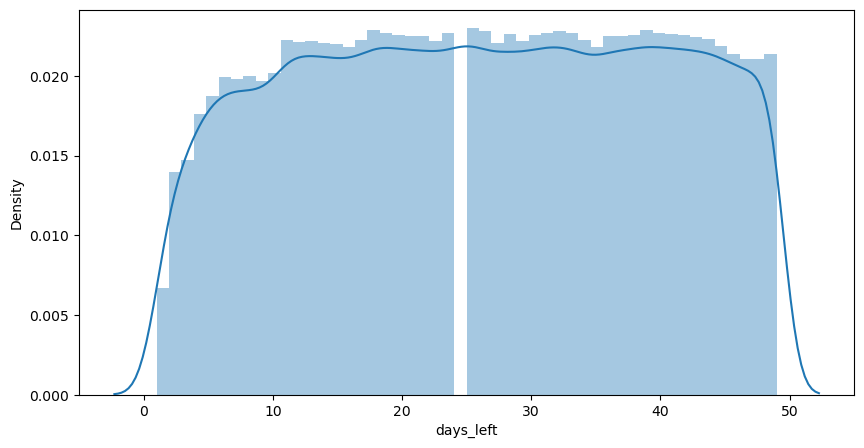

In [69]:
# distribution of data for days_left

plt.figure(figsize = (10,5))  
sns.distplot(df["days_left"])

    From this visualization we can clearly see that The data is normaly distributed and vary between 1 to 50 days

#### For column Price :-

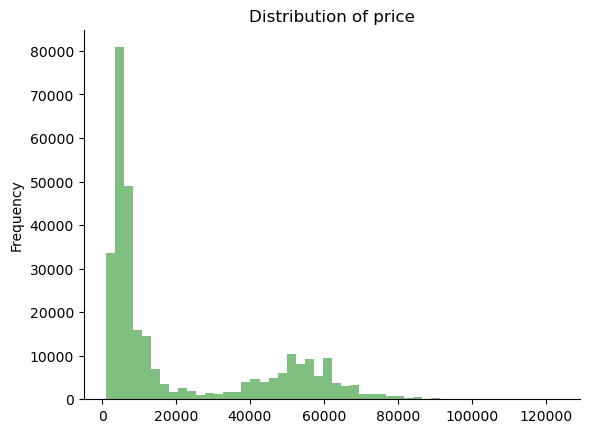

In [70]:
df["price"].plot(kind = "hist", bins =50, color = "green", alpha =.5)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Distribution of price")
plt.show()

<AxesSubplot:xlabel='price', ylabel='Density'>

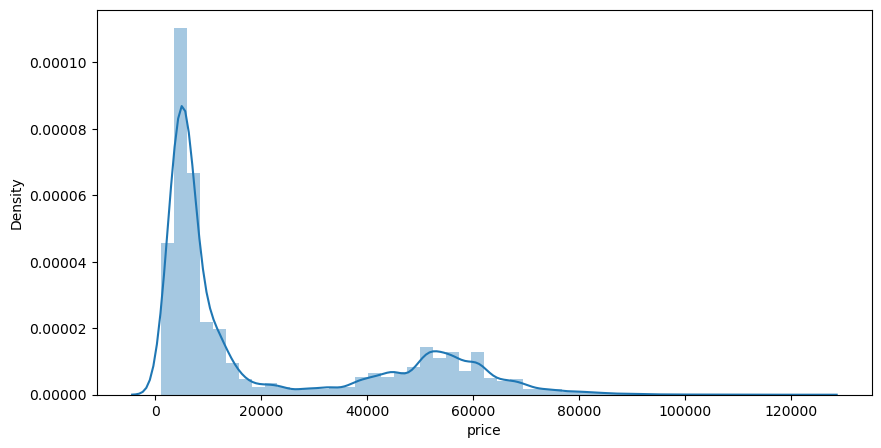

In [71]:
plt.figure(figsize = (10,5))  
sns.distplot(df["price"])

    The data is centred around some specific and peak at around 5,000 and 50,000. Investigation relevels that a contributing factor to this is due to the flight class.

### Bivariate anylysis 

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300259 entries, 0 to 300260
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300259 non-null  object 
 1   flight            300259 non-null  object 
 2   source_city       300259 non-null  object 
 3   departure_time    300259 non-null  object 
 4   stops             300259 non-null  int64  
 5   arrival_time      300259 non-null  object 
 6   destination_city  300259 non-null  object 
 7   class             300259 non-null  object 
 8   duration          300259 non-null  float64
 9   days_left         300259 non-null  int64  
 10  price             300259 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 35.6+ MB


#### 1.Does price vary with Airlines? 

<AxesSubplot:xlabel='airline', ylabel='price'>

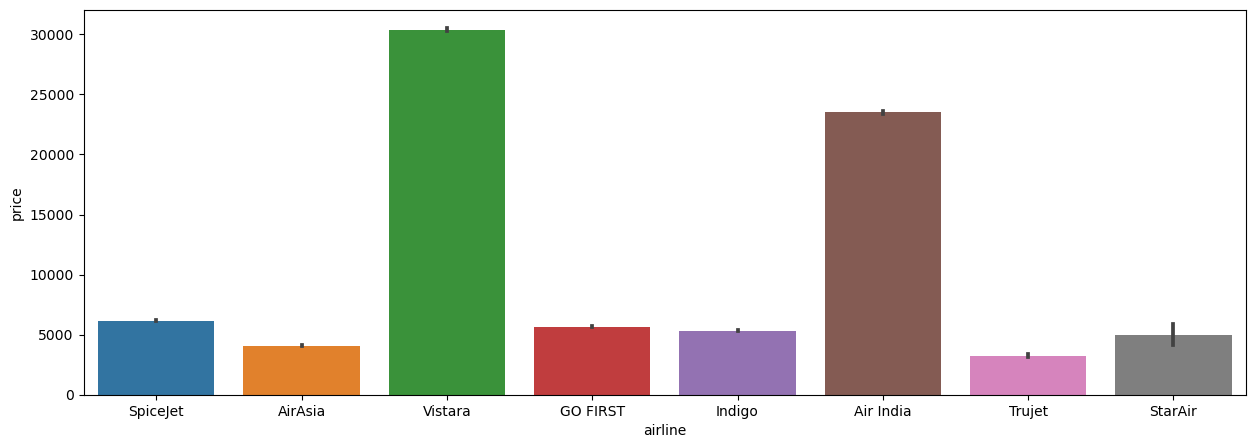

In [73]:
plt.figure(figsize = (15,5))
sns.barplot(data = df, x = "airline" , y = "price")

    From this we can say that Vistara has the maximum fair comparision with other Flight

#### 2.How is the price affected when tickets are bought in just 1 or 2 days before departure?

<AxesSubplot:xlabel='days_left', ylabel='price'>

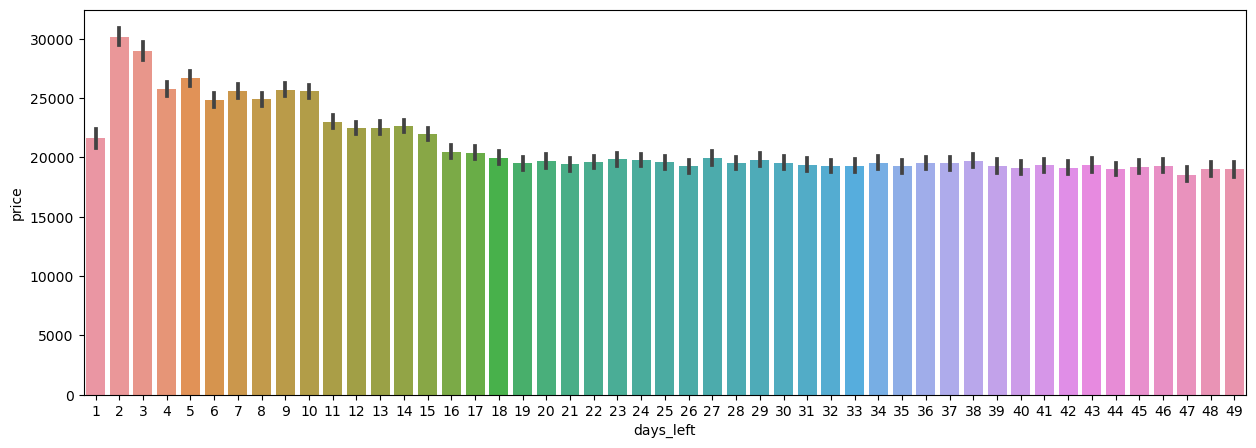

In [74]:
plt.figure(figsize = (15,5))
sns.barplot(x= "days_left",y = "price",data = df)

    We can clearly see that Ticket price are higher if baught within 1 to 7 days

####  3.Does ticket price change based on the departure time and arrival time?

<AxesSubplot:xlabel='arrival_time', ylabel='price'>

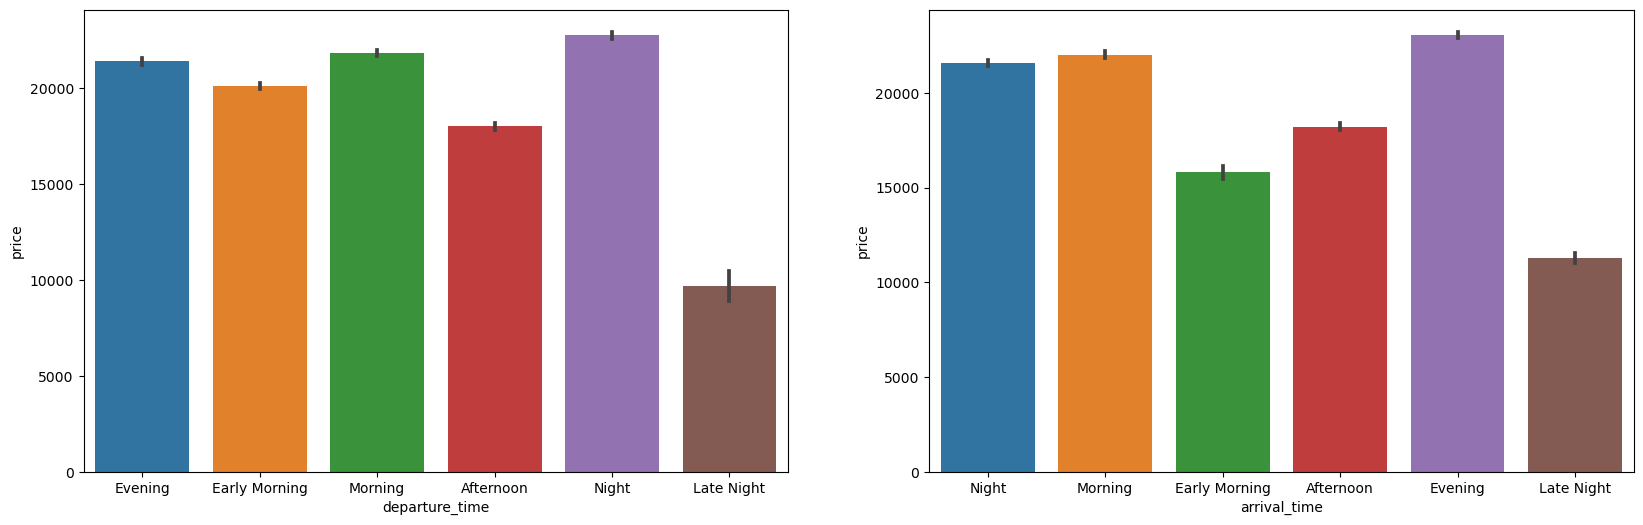

In [75]:
fig,ax=plt.subplots(1,2,figsize=(20,6))

sns.barplot(x='departure_time',y='price',data=df,ax=ax[0])
sns.barplot(x='arrival_time',y='price',data=df,ax=ax[1])

    From this we can say that Night has generally higher price and late night has lower price for departure_time and For arrival time evening has higher price

#### 4.How the price changes with change in Source and Destination? 

<AxesSubplot:xlabel='destination_city', ylabel='price'>

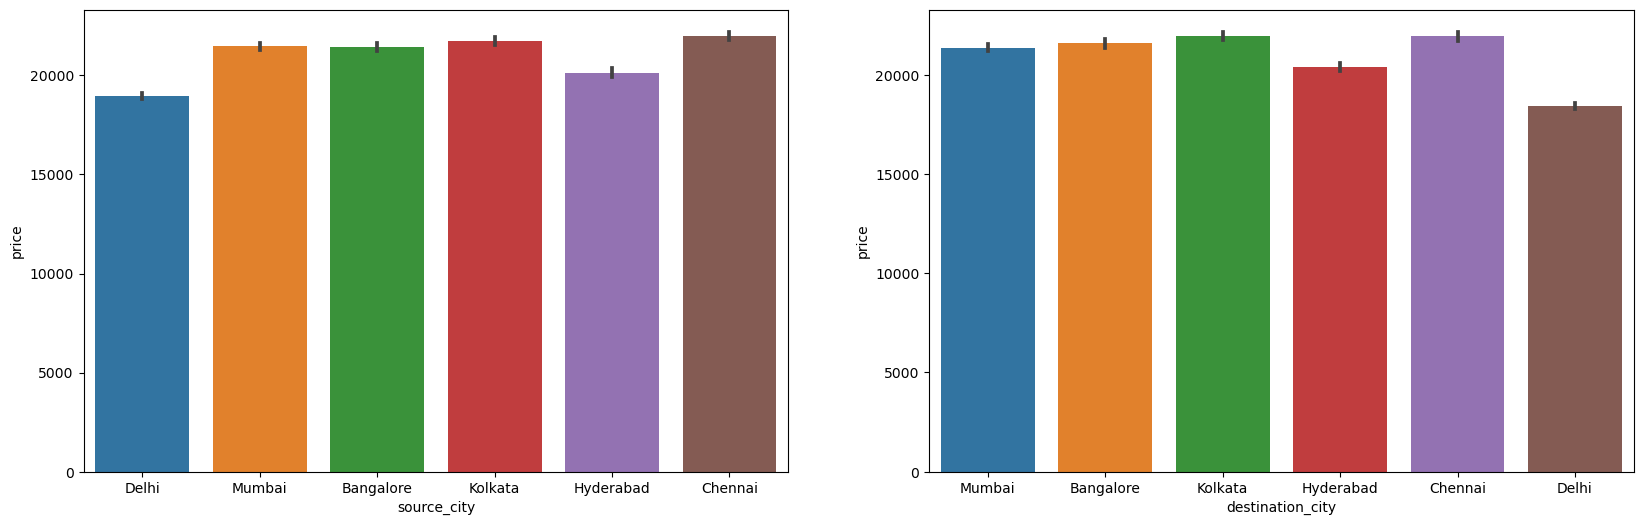

In [76]:
fig,ax=plt.subplots(1,2,figsize=(20,6))

sns.barplot(x='source_city',y='price',data=df,ax=ax[0])
sns.barplot(x='destination_city',y='price',data=df,ax=ax[1])

    From this we can say that Chennai has maximum price to take_off and landing.

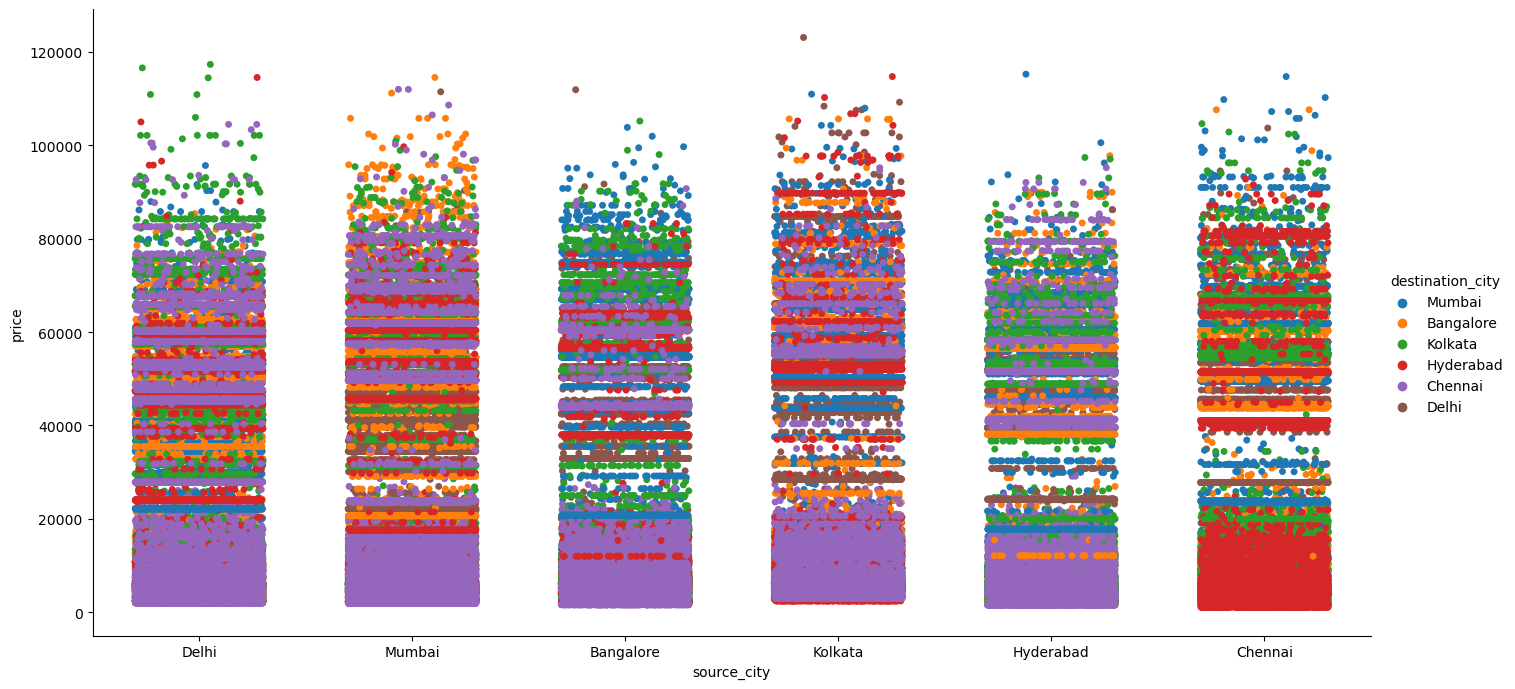

In [77]:
sns.catplot(data = df, x = "source_city" , y = "price", kind = "strip" , hue = "destination_city",aspect = 2,height = 7,jitter = 0.3)
plt.show()

#### 5. How does the ticket price vary between Economy and Business class? 

<AxesSubplot:xlabel='class', ylabel='price'>

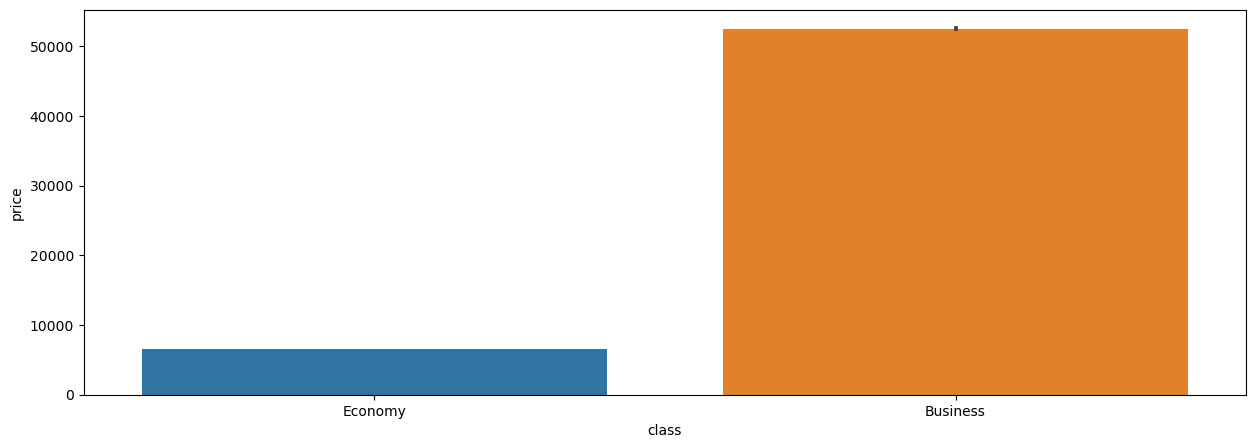

In [78]:
plt.figure(figsize = (15,5))
sns.barplot(data = df, x = "class" , y = "price")

Text(0.5, 1.0, 'Distribution of price and airline')

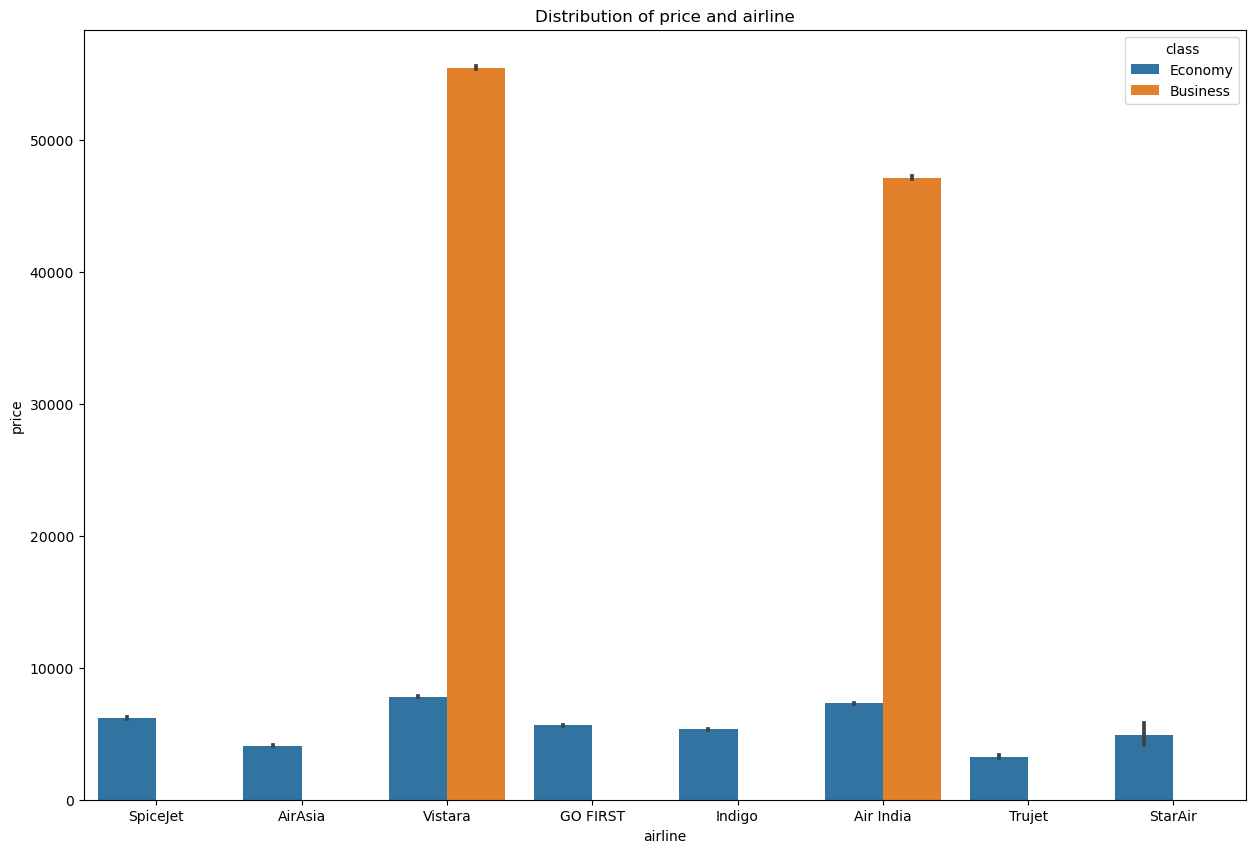

In [79]:
plt.figure(figsize = (15,10))
sns.barplot(data = df, x = "airline" , y = "price" , hue = "class")
plt.title("Distribution of price and airline")

    from this we can say that Business class fair maximum for vistara followed by air india.

### Feature Enginearing 

In [80]:
df.sample(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
186112,Indigo,6E-591,Chennai,Morning,1,Evening,Delhi,Economy,8.08,40,2051
34216,Indigo,6E-2479,Delhi,Morning,1,Evening,Hyderabad,Economy,7.00,42,2098
184198,Indigo,6E-2752,Chennai,Evening,0,Night,Delhi,Economy,2.75,28,2329
250997,Vistara,UK-808,Bangalore,Morning,1,Evening,Mumbai,Business,9.67,27,67004
168183,Vistara,UK-894,Hyderabad,Evening,0,Evening,Bangalore,Economy,1.00,27,1776


In [81]:
#feature engineering destination and source in on column
df["source_and_destination"] = df[["source_city", "destination_city"]].apply(lambda x: "-".join(x), axis=1)

In [82]:
#source and destination is made it into a single column

df.drop(["source_city","destination_city"],axis=1,inplace=True)


In [83]:
df.to_csv("Model_flight_data_.csv", index = False)

#### Converting Datatypes of each column to numerical values 

In [84]:
# replace the value of calss column economy class 0 and business 1 and same with departure_Time and Arrival_Time

df["class"].replace({"Economy":0,"Business":1},inplace = True)
df["departure_time"].replace({"Morning":0,"Evening":1,"Early Morning":2,"Night":3,"Afternoon":4,"Late Night":5},inplace = True)
df["arrival_time"].replace({"Morning":0,"Evening":1,"Early Morning":2,"Night":3,"Afternoon":4,"Late Night":5},inplace = True)

In [85]:
df.sample(5)

,airline,flight,departure_time,stops,arrival_time,class,duration,days_left,price,source_and_destination
62800,Air India,AI-635,2,1,4,0,7.42,9,13608,Mumbai-Kolkata
172638,Vistara,UK-870,3,1,1,0,23.00,18,6170,Hyderabad-Kolkata
228875,Vistara,UK-875,1,1,1,1,24.58,38,41269,Mumbai-Delhi
280472,Air India,AI-840,3,1,3,1,23.25,3,58247,Hyderabad-Bangalore
236334,Vistara,UK-970,0,1,1,1,9.33,27,64285,Mumbai-Kolkata


In [86]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'airlines'.

df['airline']= label_encoder.fit_transform(df['airline'])

# Encoding labels in source_and_destination.

df['source_and_destination']= label_encoder.fit_transform(df['source_and_destination'])

In [87]:
df.sample(5)

,airline,flight,departure_time,stops,arrival_time,class,duration,days_left,price,source_and_destination
185643,1,I5-319,0,1,3,0,11.67,37,3093,6
3011,0,AI-475,4,1,4,0,24.58,17,4780,14
7480,2,G8-354,3,0,5,0,2.17,38,2410,14
69684,0,AI-639,0,1,0,0,22.83,46,5070,29
128292,0,AI-768,4,2,3,0,6.67,7,12054,24


In [88]:
# By analysing the data based on the duration  and Flight we can observe that it didn't clearly influenced in the price in a stable way so we can remove it
df.drop(['duration','flight'],axis=1,inplace = True)

In [89]:
df.sample(5)

,airline,departure_time,stops,arrival_time,class,days_left,price,source_and_destination
66670,7,4,1,3,0,30,5949,29
118878,7,0,1,3,0,40,4672,0
35246,3,4,1,3,0,49,2098,12
36724,7,0,1,3,0,12,11520,11
153064,7,4,1,1,0,7,10018,17


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300259 entries, 0 to 300260
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   airline                 300259 non-null  int64
 1   departure_time          300259 non-null  int64
 2   stops                   300259 non-null  int64
 3   arrival_time            300259 non-null  int64
 4   class                   300259 non-null  int64
 5   days_left               300259 non-null  int64
 6   price                   300259 non-null  int64
 7   source_and_destination  300259 non-null  int64
dtypes: int64(8)
memory usage: 28.7 MB


In [91]:
A = {'airline':'int','departure_time':'int','stops':'int','arrival_time':'int','class':'int','days_left':'int','price':'int','source_and_destination':'int'}

In [92]:
df = df.astype(A)
print(df.dtypes)

airline                   int64
departure_time            int64
stops                     int64
arrival_time              int64
class                     int64
days_left                 int64
price                     int64
source_and_destination    int64
dtype: object


In [93]:
#df.to_csv("Model_flight_data_Vivek.csv", index = False)

### Model Building 

In [94]:
# Splitting the data into X,y
X = df.drop('price',axis=1).values
Y = df['price'].values.reshape(-1,1)

In [95]:
from sklearn.model_selection import train_test_split
# using the train test split function
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=42)

In [96]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [97]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


In [98]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

In [99]:
def get_accuracy(model_name):
    model         = model_name
    model.fit(X_train,Y_train)
    Y_pred_train  = model.predict(X_train)
    mse_train     = mean_squared_error(Y_train,Y_pred_train)
    mae_train     = mean_absolute_error(Y_train,Y_pred_train)
    r2score_train = r2_score(Y_train,Y_pred_train)*100
    
    Y_pred_test   = model.predict(X_test)
    mse_test      = mean_squared_error(Y_test,Y_pred_test)
    mae_test      = mean_absolute_error(Y_test,Y_pred_test)
    r2score_test = r2_score(Y_test,Y_pred_test)*100
    
    return print(f"mse_train {mse_train} \nmae_train {mae_train} \nr2score_train {r2score_train} \nmse_test {mse_test} \nmae_test {mae_test} \nr2score_test {r2score_test}")

In [100]:
for model_name,model in [("LinearRegression",LinearRegression()),("DecisionTreeRegressor",DecisionTreeRegressor()),("RandomForestRegressor",RandomForestRegressor()),("XGBRegressor",XGBRegressor()),("AdaBoostRegressor",AdaBoostRegressor()),("GradientBoostingRegressor",GradientBoostingRegressor())]:
    print(model_name)
    print(get_accuracy(model))
    print("*"*100)

LinearRegression
mse_train 48780421.17252918 
mae_train 4572.374325199689 
r2score_train 90.5255342847616 
mse_test 47924907.074770674 
mae_test 4546.866211565453 
r2score_test 90.71353825611578
None
****************************************************************************************************
DecisionTreeRegressor
mse_train 8864518.179153502 
mae_train 1267.8518534986329 
r2score_train 98.27827288998901 
mse_test 24271921.63246658 
mae_test 2328.2147978667126 
r2score_test 95.29680315626288
None
****************************************************************************************************
RandomForestRegressor
mse_train 9305290.382351376 
mae_train 1428.3164713704273 
r2score_train 98.19266310993693 
mse_test 20050464.716910772 
mae_test 2201.3106583937297 
r2score_test 96.1147994872438
None
****************************************************************************************************
XGBRegressor
mse_train 15985913.644014703 
mae_train 2236.936234700584 
r2score_tra